# LangGraph

Langgraph Documentation: https://langchain-ai.github.io/langgraph/concepts/why-langgraph/

=====================================================================================================

Langgraph has two major constituents:

1. Node which is a function
2. Edges are the connectivitie between those functions, relationship between the functions.

There are 2 types of graphs, Cyclic and Acyclic.

=====================================================================================================

#### Agentic Flow:

##### Acyclic:

Input -> LLM -> ```<thinking>``` -> ```<action>``` -> ```<observation>``` -> Output

##### Cyclic:
```
          _____________________________________________________
          |                                                   |
          |                                                  \ /
Input -> LLM -> ```<thinking>``` -> ```<action>``` -> ```<observation>``` -> Output
         / \                                                  |
          |                                                   |
          -----------------------------------------------------

In [1]:
def function1(input1):
    return input1 + " from function1"

In [2]:
def function2(input2):
    return input2 + " from function2"

In [3]:
def function3(input3):
    return input3 + " from function3"

In [4]:
function1("Hello")

'Hello from function1'

In [5]:
function2("Hello")

'Hello from function2'

In [6]:
function3("Hello")

'Hello from function3'

In [7]:
from langgraph.graph import StateGraph
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, AIMessage

In [8]:
# Define the state schema - THIS IS REQUIRED!
class WorkflowState(TypedDict):
    messages: Annotated[list, "A list of messages"]
    result: Annotated[str, "The final result"]

In [9]:
workflow1 = StateGraph(WorkflowState)

In [10]:
def function1(state: WorkflowState) -> WorkflowState:
    """First function in the workflow"""
    
    # Get the first message from the state
    first_message = state["messages"][0] if state["messages"] else "No message"
    
    # Process the message
    processed_result = f"{first_message} processed by function1"
    
    # Return updated state
    return {
        "messages": state["messages"],
        "result": processed_result
    }

In [11]:
def function2(state: WorkflowState) -> WorkflowState:
    """Second function in the workflow"""
    # Get the result from previous function
    previous_result = state["result"]
    
    # Process further
    new_result = f"{previous_result} → processed by function2"
    
    # Return updated state
    return {
        "messages": state["messages"],
        "result": new_result
    }

In [12]:
def function3(state: WorkflowState) -> WorkflowState:
    """Third function in the workflow"""
    # Get the result from previous function
    previous_result = state["result"]
    
    # Final processing
    final_result = f"{previous_result} → processed by function3 (FINAL)"
    
    # Return updated state
    return {
        "messages": state["messages"],
        "result": final_result
    }

In [13]:
workflow1.add_node("func1", function1)

In [14]:
workflow1.add_node("func2", function2)

In [15]:
workflow1.add_node("func3", function3)

In [16]:
workflow1.set_entry_point("func1")

In [17]:
workflow1.add_edge("func1", "func2")

In [18]:
workflow1.add_edge("func2", "func3")

In [19]:
workflow1.set_finish_point("func3")

In [20]:
app = workflow1.compile()

In [21]:
from IPython.display import Image, display

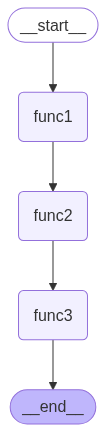

In [22]:

display(Image(app.get_graph().draw_mermaid_png()))



In [23]:
result = app.invoke({"messages": ["Hello, I am Sanyukta", "I am a student"]})
print("✅ Final Result:", result["result"])

✅ Final Result: Hello, I am Sanyukta processed by function1 → processed by function2 → processed by function3 (FINAL)


In [24]:
for output in app.stream({"messages": ["Hello, I am Sanyukta"]}):
    for key, value in output.items():
        print(f"here is the value from {key}")
        print("_______________________")
        print (value)
        print("\n")


here is the value from func1
_______________________
{'messages': ['Hello, I am Sanyukta'], 'result': 'Hello, I am Sanyukta processed by function1'}


here is the value from func2
_______________________
{'messages': ['Hello, I am Sanyukta'], 'result': 'Hello, I am Sanyukta processed by function1 → processed by function2'}


here is the value from func3
_______________________
{'messages': ['Hello, I am Sanyukta'], 'result': 'Hello, I am Sanyukta processed by function1 → processed by function2 → processed by function3 (FINAL)'}




In [2]:
from langgraph.graph import StateGraph
from typing import TypedDict, Annotated
from langchain_core.messages import HumanMessage, AIMessage

In [3]:
# Define the state schema - THIS IS REQUIRED!
class WorkflowState(TypedDict):
    messages: Annotated[list, "A list of messages"]
    result: Annotated[str, "The final result"]

In [4]:
workflow2 = StateGraph(WorkflowState)

In [5]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

output = model.invoke("Tell me about Tata?")

output

AIMessage(content="Tata is a massive Indian multinational conglomerate, one of the largest in the world.  It's not a single company, but a group of over 100 independent operating companies, all under the Tata brand umbrella.  Its history spans over 150 years, and its businesses are incredibly diverse, spanning multiple sectors.\n\nHere's a breakdown of key aspects:\n\n* **History:** Founded in 1868 by Jamsetji Tata, the group's early ventures focused on textiles.  Over time, it expanded aggressively into diverse sectors, becoming a significant player in India's industrialization.  The group's philosophy emphasizes ethical conduct, social responsibility, and long-term value creation.\n\n* **Diversity of Businesses:**  Tata's portfolio is vast and includes:\n    * **Automotive:** Tata Motors (cars, trucks, buses), Jaguar Land Rover\n    * **Steel:** Tata Steel\n    * **Information Technology:** Tata Consultancy Services (TCS), Tata Elxsi\n    * **Consumer Goods:** Tata Consumer Products 

In [6]:
output.content

"Tata is a massive Indian multinational conglomerate, one of the largest in the world.  It's not a single company, but a group of over 100 independent operating companies, all under the Tata brand umbrella.  Its history spans over 150 years, and its businesses are incredibly diverse, spanning multiple sectors.\n\nHere's a breakdown of key aspects:\n\n* **History:** Founded in 1868 by Jamsetji Tata, the group's early ventures focused on textiles.  Over time, it expanded aggressively into diverse sectors, becoming a significant player in India's industrialization.  The group's philosophy emphasizes ethical conduct, social responsibility, and long-term value creation.\n\n* **Diversity of Businesses:**  Tata's portfolio is vast and includes:\n    * **Automotive:** Tata Motors (cars, trucks, buses), Jaguar Land Rover\n    * **Steel:** Tata Steel\n    * **Information Technology:** Tata Consultancy Services (TCS), Tata Elxsi\n    * **Consumer Goods:** Tata Consumer Products (tea, coffee, salt

In [7]:
def llm(state: WorkflowState):

    """LLM function in the workflow2"""

    from langchain_google_genai import ChatGoogleGenerativeAI
    model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

    # Get the first message from the state
    input = state["messages"][0] if state["messages"] else "No message"

    output = model.invoke(input)
    return {
        "messages": state["messages"],
        "result": output.content
    }

In [8]:
def token_counter(state: WorkflowState):

    """Token counter function in the workflow2"""

    # Get the first message from the state
    input = state["result"] 

    token=input.split()
    token_count=len(token)
    
    return {
        "messages": f"{state["messages"]} → {input}",
        "result": f"The number of tokens in the input is {token_count}"
    }

In [9]:
workflow2.add_node("My_LLM", llm)

In [10]:
workflow2.add_node("LLM_Output_Token_Counter", token_counter)

In [11]:
workflow2.add_edge("My_LLM", "LLM_Output_Token_Counter")

In [12]:
workflow2.set_entry_point("My_LLM")

In [13]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [14]:
app2=workflow2.compile()

In [15]:
from IPython.display import Image, display

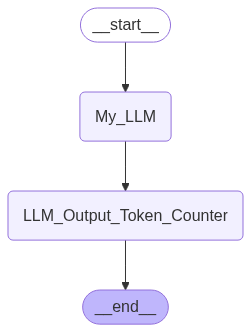

In [16]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [40]:
final_result = app2.invoke({"messages": ["Can you tell me the capital of France?"]})
print(final_result["result"])

The number of tokens in the input is 6


In [46]:
for output in app2.stream({"messages": ["Can you tell me the capital of France?"]}):
    for key, value in output.items():
        print(f"here is the value from {key}")
        print("_______________________")
        print (value)
        print("\n")

here is the value from My_LLM
_______________________
{'messages': ['Can you tell me the capital of France?'], 'result': 'Paris'}


here is the value from LLM_Output_Token_Counter
_______________________
{'messages': "['Can you tell me the capital of France?'] → Paris", 'result': 'The number of tokens in the input is 1'}




In [18]:
final_result2 = app2.invoke({"messages": ["Tell me about Tata?"]})
print(final_result2["result"])

The number of tokens in the input is 417


In [17]:
for output in app2.stream({"messages": ["Tell me about Tata?"]}):
    for key, value in output.items():
        print(f"here is the value from {key}")
        print("_______________________")
        print(value["messages"])
        print("\n")
        print (value["result"])
        print("\n")

here is the value from My_LLM
_______________________
['Tell me about Tata?']


Tata is a massive Indian multinational conglomerate, one of the largest in the world.  It's not a single company, but a group of over 100 operating companies, under the umbrella of Tata Sons, a holding company.  Its diverse portfolio spans numerous sectors, making it a truly sprawling enterprise.

Here are some key aspects of Tata:

* **History and Heritage:** Founded in 1868 by Jamsetji Tata, the group has a long and storied history, deeply ingrained in Indian culture and known for its ethical business practices and philanthropic endeavors.  This strong emphasis on social responsibility is a significant part of its identity.

* **Diversity of Businesses:** Tata's businesses are incredibly diverse, ranging from:
    * **Automotive:** Tata Motors (manufacturers of cars, trucks, and buses, including Jaguar Land Rover),
    * **Steel:** Tata Steel (a major global steel producer),
    * **IT Services:** Tata Co

________________________________________________________________________________________________________


# ADVANCED LANGGRAPH

________________________________________________________________________________________________________


Graph Architecture:
```

            -------------                               AGENDA:                
            |           |                               1. Conditional Edges
            | __start__ |                               2. State Management
            -------------
                  |
                  |
                  |
                 \ /
            -------------
            |           |
            | supervisor|
            -------------
                /   \
               /     \
              /       \
        LLM CALL    RAG CALL    
             |         | 
             |         |
            \ /       \ /
    -------------     -------------
    |           |     |            |
    |  LLM      |     |   RAG      |
    -------------     -------------
            |               |
            |               |
            \               /
             \             /
             \ /         \ /
              -------------
              |           |
              |  __end__  |
              -------------
    
```

________________________________________________________________________________________________________

### REACT AGENT

React -> LLM -> Multiflow

________________________________________________________________________________________________________


##### Example:
```

            -------------                                               
            |           |                             
            | __start__ |         
            -------------
                  |
                  |  <----- Q1. How are you?,  Q2. What is the current GDP of USA?
                  |
                 \ /
            -------------
            |           |
            | supervisor|  <- The supervisor calls the LLM node for the Q1. How are you? then ends.
            -------------  <- The supervisor calls the RAG node for the Q2. What is the current GDP of USA?.
                /   \
               /     \
              /       \
        LLM CALL    RAG CALL    
             |         | 
             |         |
            \ /       \ /
    -------------     -------------            -------------
    |           |     |            |           |            |
    |  LLM      |     |   RAG      | ------->  |  Vector DB |  <---- Data (Eg.: USA Industry)
    -------------     -------------            --------------
            |               |
            |               |
            \               /
             \             /
             \ /         \ /
              -------------
              |           |
              |  __end__  |
              -------------
    
```